In [8]:
import os
import sys
from pathlib import Path

print("Current Working Directory:", os.getcwd())

PROJECT_DIR = Path(os.getcwd()).parent
sys.path.insert(0, str(PROJECT_DIR))

print("Project DIR:", PROJECT_DIR)
print("Does src exist here?:", (PROJECT_DIR / "src").exists())


Current Working Directory: c:\Users\Abhishek Karyagol\OneDrive\Tài liệu\infosys\AI_Cricket_Player_Performance_Prediction\notebooks
Project DIR: c:\Users\Abhishek Karyagol\OneDrive\Tài liệu\infosys\AI_Cricket_Player_Performance_Prediction
Does src exist here?: True


In [9]:
from src.config import RAW_DIR, PROCESSED_DIR
print("RAW_DIR:", RAW_DIR)
print("PROCESSED_DIR:", PROCESSED_DIR)


RAW_DIR: C:\Users\Abhishek Karyagol\OneDrive\Tài liệu\infosys\AI_Cricket_Player_Performance_Prediction\data\raw
PROCESSED_DIR: C:\Users\Abhishek Karyagol\OneDrive\Tài liệu\infosys\AI_Cricket_Player_Performance_Prediction\data\processed


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.config import RAW_DIR, PROCESSED_DIR


In [11]:
matches = pd.read_csv(RAW_DIR / "matches.csv")
deliveries = pd.read_csv(RAW_DIR / "deliveries.csv")

print("Matches:", matches.shape)
print("Deliveries:", deliveries.shape)

matches.head()


Matches: (1095, 20)
Deliveries: (260920, 17)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [12]:
print("Matches Columns:\n", matches.columns)
print("\nDeliveries Columns:\n", deliveries.columns)


Matches Columns:
 Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

Deliveries Columns:
 Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [13]:
print("Missing Values in matches:")
display(matches.isnull().sum().sort_values(ascending=False).head(15))

print("\nMissing Values in deliveries:")
display(deliveries.isnull().sum().sort_values(ascending=False).head(15))


Missing Values in matches:


method             1074
city                 51
result_margin        19
player_of_match       5
winner                5
target_runs           3
target_overs          3
id                    0
date                  0
season                0
venue                 0
match_type            0
toss_decision         0
toss_winner           0
team2                 0
dtype: int64


Missing Values in deliveries:


fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
non_striker              0
bowler                   0
batter                   0
ball                     0
total_runs               0
extra_runs               0
dtype: int64

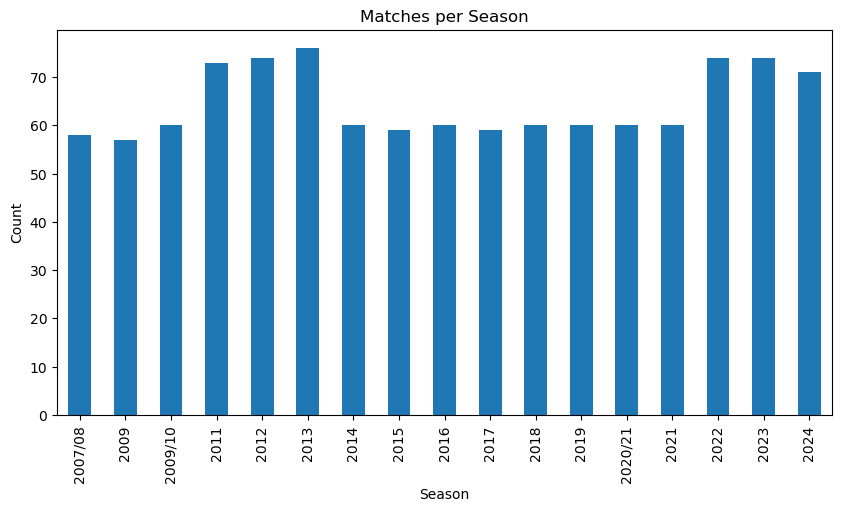

In [14]:
matches["date"] = pd.to_datetime(matches["date"], errors="coerce")

plt.figure(figsize=(10,5))
matches["season"].value_counts().sort_index().plot(kind="bar")
plt.title("Matches per Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()


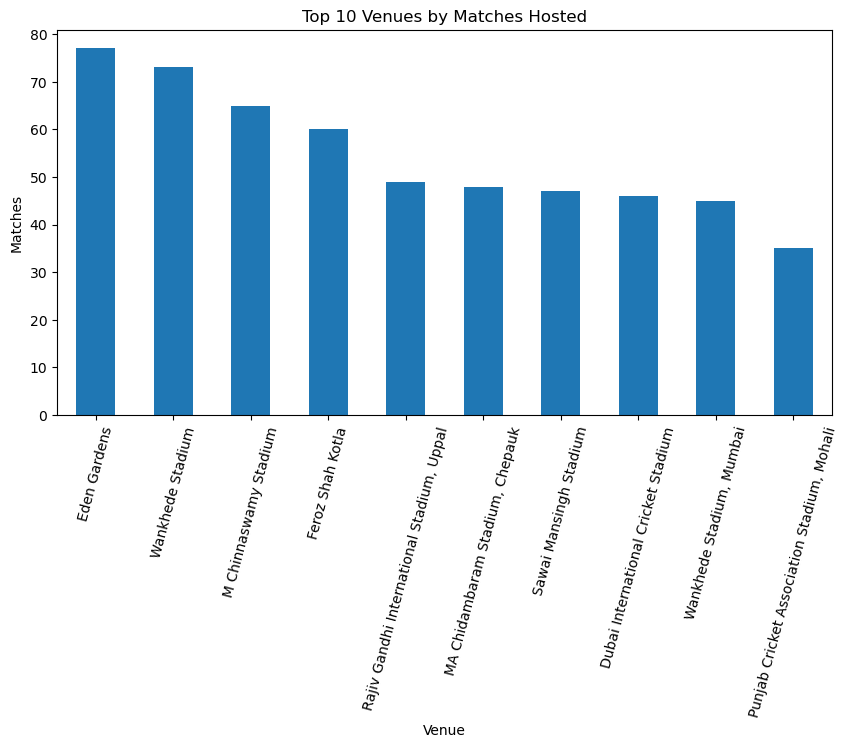

In [15]:
plt.figure(figsize=(10,5))
matches["venue"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Venues by Matches Hosted")
plt.xlabel("Venue")
plt.ylabel("Matches")
plt.xticks(rotation=75)
plt.show()


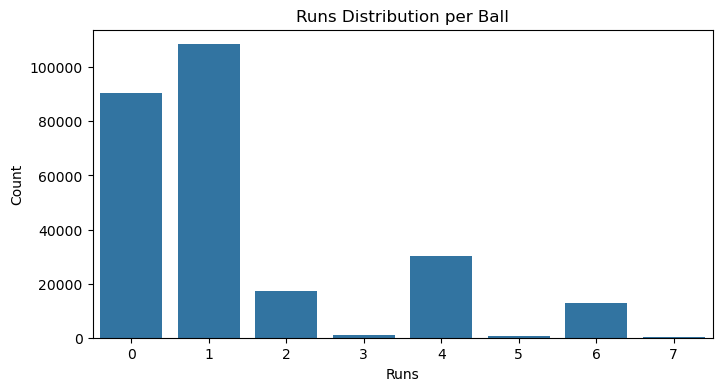

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x=deliveries["total_runs"])
plt.title("Runs Distribution per Ball")
plt.xlabel("Runs")
plt.ylabel("Count")
plt.show()


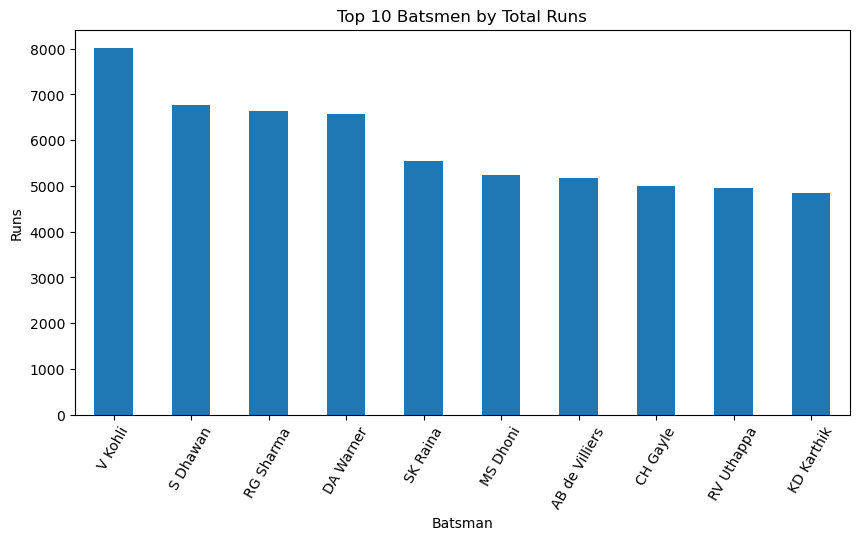

In [17]:
top_batsmen = (
    deliveries.groupby("batter")["batsman_runs"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_batsmen.plot(kind="bar")
plt.title("Top 10 Batsmen by Total Runs")
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.xticks(rotation=60)
plt.show()


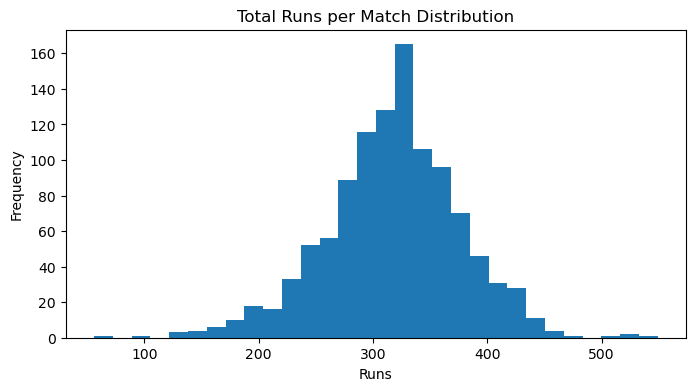

In [18]:
runs_per_match = deliveries.groupby("match_id")["total_runs"].sum()

plt.figure(figsize=(8,4))
plt.hist(runs_per_match, bins=30)
plt.title("Total Runs per Match Distribution")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()
